# This is a trial to decode motor imagery data points from a dataset thats used for another purpose.

**ThisThe dataset is collected for the purpose of investigating how brainwave signals can be used to industrial insider threat detection. The dataset was connected using Emotiv Insight 5 channels device**

*What we have done is just a trial to get an approximation of what and how the data points of a Motor Imagery Action Could look like.*

* What i've done here is bandpass filtering the labels i've got in this data from the 5 channels, The data points that this Bandpass accepts, assigned a label -> 1, what doesnt pass assigns label -> 0.

* Then, using a RandomForest Classifier for training the model on detecting the -POSSIBLE- Motor Imagery Data points, Achieved Accuracy of 80%.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import mne 
import numpy as np
from scipy.signal import butter, lfilter, welch
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from scipy.signal import butter, lfilter

In [84]:
eeg_data = pd.read_csv('IEEE.csv')
print(eeg_data.head)
print(eeg_data.keys())

<bound method NDFrame.head of       Unnamed: 0   TimeStamp    AF3_THETA    AF3_ALPHA  AF3_LOW_BETA   
0            449  1563945527  1602.004637   820.143124    468.603529  \
1            450  1563945527  1648.410749  1027.630001    543.252317   
2            451  1563945527  1605.193182  1189.284067    630.953231   
3            452  1563945527  1462.585805  1264.364852    703.198872   
4            453  1563945528  1305.079769  1264.657727    762.149646   
...          ...         ...          ...          ...           ...   
1545        1677  1564196571     2.450292     1.297124      0.998386   
1546        1678  1564196571     2.621298     1.078648      1.096047   
1547        1679  1564196572     2.793150     0.974216      1.277758   
1548        1680  1564196572     2.992665     1.005759      1.507816   
1549        1681  1564196572     3.098822     1.141721      1.702959   

      AF3_HIGH_BETA  AF3_GAMMA  T7_THETA  T7_ALPHA  T7_LOW_BETA  ...   
0        312.692672  43.838238  1

In [85]:
eeg_data.shape

(1550, 35)

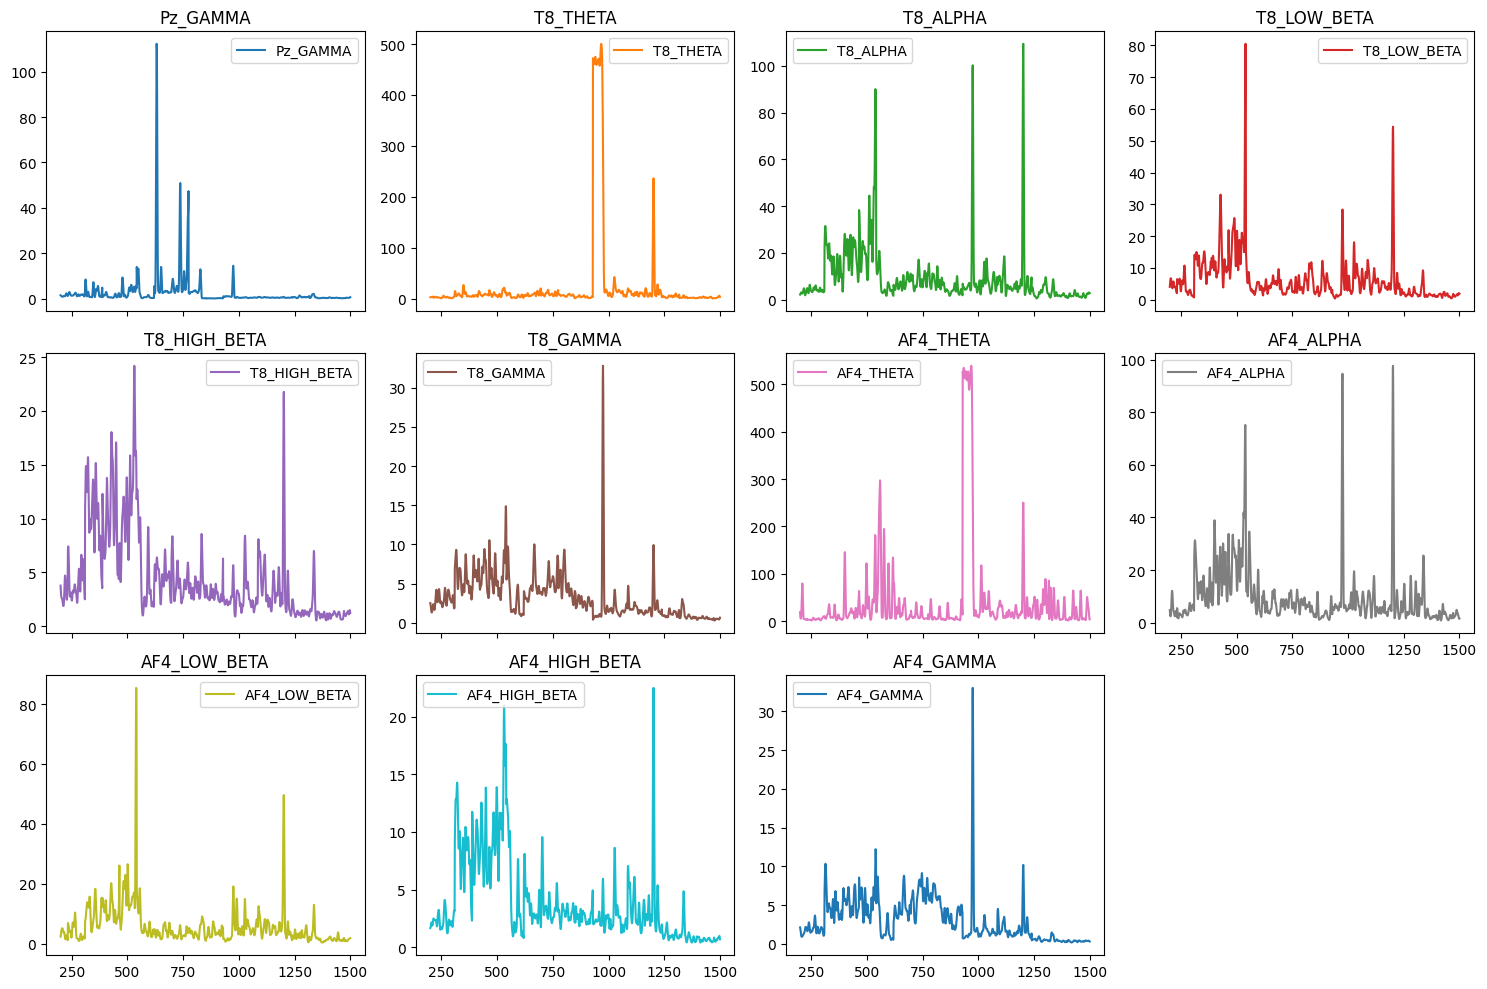

In [99]:
columns_to_plot = [
    'Pz_GAMMA', 'T8_THETA', 'T8_ALPHA', 'T8_LOW_BETA', 'T8_HIGH_BETA',
    'T8_GAMMA', 'AF4_THETA', 'AF4_ALPHA', 'AF4_LOW_BETA', 'AF4_HIGH_BETA',
    'AF4_GAMMA'
]

start_index = 200
end_index = 1500

eeg_data.loc[start_index:end_index, columns_to_plot].plot(subplots=True, layout=(3, 4), figsize=(15, 10), title=columns_to_plot)
plt.tight_layout()
plt.show()

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("IEEE.csv")

columns_to_filter = [
    'Pz_GAMMA', 'T8_THETA', 'T8_ALPHA', 'T8_LOW_BETA', 'T8_HIGH_BETA',
    'T8_GAMMA', 'AF4_THETA', 'AF4_ALPHA', 'AF4_LOW_BETA', 'AF4_HIGH_BETA',
    'AF4_GAMMA'
]

lowcut = 8.0  
highcut = 30.0  


def bandpass_filter(data, lowcut, highcut, fs=128.0):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(3, [low, high], btype='band')
    filtered_data = lfilter(b, a, data)
    return filtered_data


labels = {}


for column in columns_to_filter:
    filtered_data = bandpass_filter(df[column], lowcut, highcut)
    
   
    labels[column] = (filtered_data >= 0.0).astype(int)


for column, label in labels.items(): 
    df['Label'] = label

# Save the DataFrame with labels to a new CSV file
df.to_csv("IEEE_with_labels.csv", index=False)


In [103]:
data = pd.read_csv('IEEE_with_labels.csv')
y = data['Label']
data = data.drop(['CQ_AF3','CQ_T7','CQ_Pz','CQ_T8','CQ_AF4','TimeStamp','seconds_of_timestamp','Label','Unnamed: 0','TimeStamp','TimeStamp_Readable'],axis = 1)

In [104]:
data

,AF3_THETA,AF3_ALPHA,AF3_LOW_BETA,AF3_HIGH_BETA,AF3_GAMMA,T7_THETA,T7_ALPHA,T7_LOW_BETA,T7_HIGH_BETA,T7_GAMMA,...,T8_THETA,T8_ALPHA,T8_LOW_BETA,T8_HIGH_BETA,T8_GAMMA,AF4_THETA,AF4_ALPHA,AF4_LOW_BETA,AF4_HIGH_BETA,AF4_GAMMA
0,1602.004637,820.143124,468.603529,312.692672,43.838238,1.113403,3.143814,3.228099,3.653197,3.233988,...,2068.768059,927.308774,607.289086,385.645319,50.306754,1589.764454,795.794284,483.600132,321.680915,43.443617
1,1648.410749,1027.630001,543.252317,273.849371,47.554865,1.187707,3.543250,3.267439,3.101986,3.385786,...,2132.468985,1152.014838,701.153485,339.696784,53.936408,1622.183379,989.696292,549.072125,275.556757,46.710437
2,1605.193182,1189.284067,630.953231,250.604223,52.334560,1.174995,3.800832,3.285394,2.640675,3.410586,...,2105.657645,1328.980974,807.126152,310.739266,58.803611,1577.271683,1141.619307,632.298231,247.283044,51.381376
3,1462.585805,1264.364852,703.198872,249.608310,57.832213,1.237306,3.847343,3.329154,2.426493,3.326307,...,1960.104214,1418.389812,894.786105,307.868532,64.770025,1439.759194,1210.840387,701.315980,242.736111,57.083412
4,1305.079769,1264.657727,762.149646,275.511102,63.599263,1.214110,3.735482,3.538992,2.569379,3.179436,...,1772.484799,1438.650503,968.307528,339.202677,71.615077,1283.662914,1206.650066,756.660901,265.861959,63.196649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,2.450292,1.297124,0.998386,0.541966,0.247456,0.620511,0.990296,1.209447,0.408993,0.254862,...,1.373955,1.419094,1.161144,0.738530,0.487597,3.246930,1.064058,0.869789,0.386583,0.246716
1546,2.621298,1.078648,1.096047,0.531550,0.288406,0.665669,0.790058,1.207863,0.394792,0.265781,...,1.513428,1.280757,0.997449,0.770371,0.462054,3.470099,1.092188,1.045635,0.440484,0.282526
1547,2.793150,0.974216,1.277758,0.551160,0.339834,0.758446,0.606003,1.208928,0.393382,0.271643,...,1.654702,1.189635,0.805284,0.774929,0.468158,3.663608,1.325104,1.264112,0.527304,0.330474
1548,2.992665,1.005759,1.507816,0.585767,0.384843,0.944366,0.483510,1.200513,0.412367,0.270652,...,1.797082,1.166202,0.636282,0.777576,0.488670,3.899068,1.665644,1.484294,0.625188,0.377461


In [105]:
x_train, x_test, y_train, y_test = train_test_split( np.asarray(data), np.asarray(y), test_size=0.2, random_state=0,shuffle= True)

In [106]:
print('The Data Training shape is',x_train.shape)
print('The Data test shape is',x_test.shape)
print('The labels Training shape is',y_train.shape)
print('The labels test shape is',y_test.shape)


The Data Training shape is (1240, 25)
The Data test shape is (310, 25)
The labels Training shape is (1240,)
The labels test shape is (310,)


In [107]:
#RandomForest - Sklearn

model=RandomForestClassifier(n_estimators=400,max_depth = 8)
model.fit(x_train,y_train)
predict=model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

cr = classification_report(y_test, predict)
print(cr)


Training Accuracy : 0.9870967741935484
Testing Accuracy : 0.8193548387096774
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       144
           1       0.87      0.78      0.82       166

    accuracy                           0.82       310
   macro avg       0.82      0.82      0.82       310
weighted avg       0.83      0.82      0.82       310



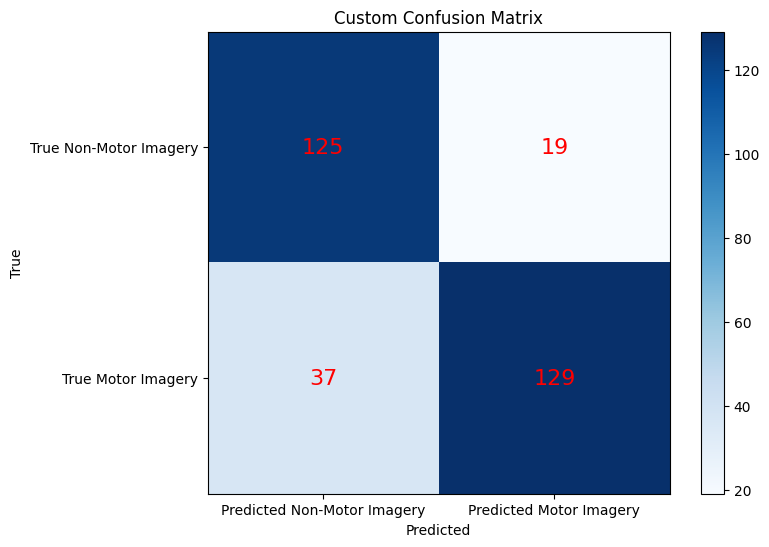

In [108]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, predict)

TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

custom_confusion_matrix = np.array([[TN, FP],
                                   [FN, TP]])


plt.figure(figsize=(8, 6))
plt.imshow(custom_confusion_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Custom Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], labels=['Predicted Non-Motor Imagery', 'Predicted Motor Imagery'])
plt.yticks([0, 1], labels=['True Non-Motor Imagery', 'True Motor Imagery'])
plt.xlabel('Predicted')
plt.ylabel('True')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(custom_confusion_matrix[i, j]), ha='center', va='center', color='red', fontsize=16)
plt.show()

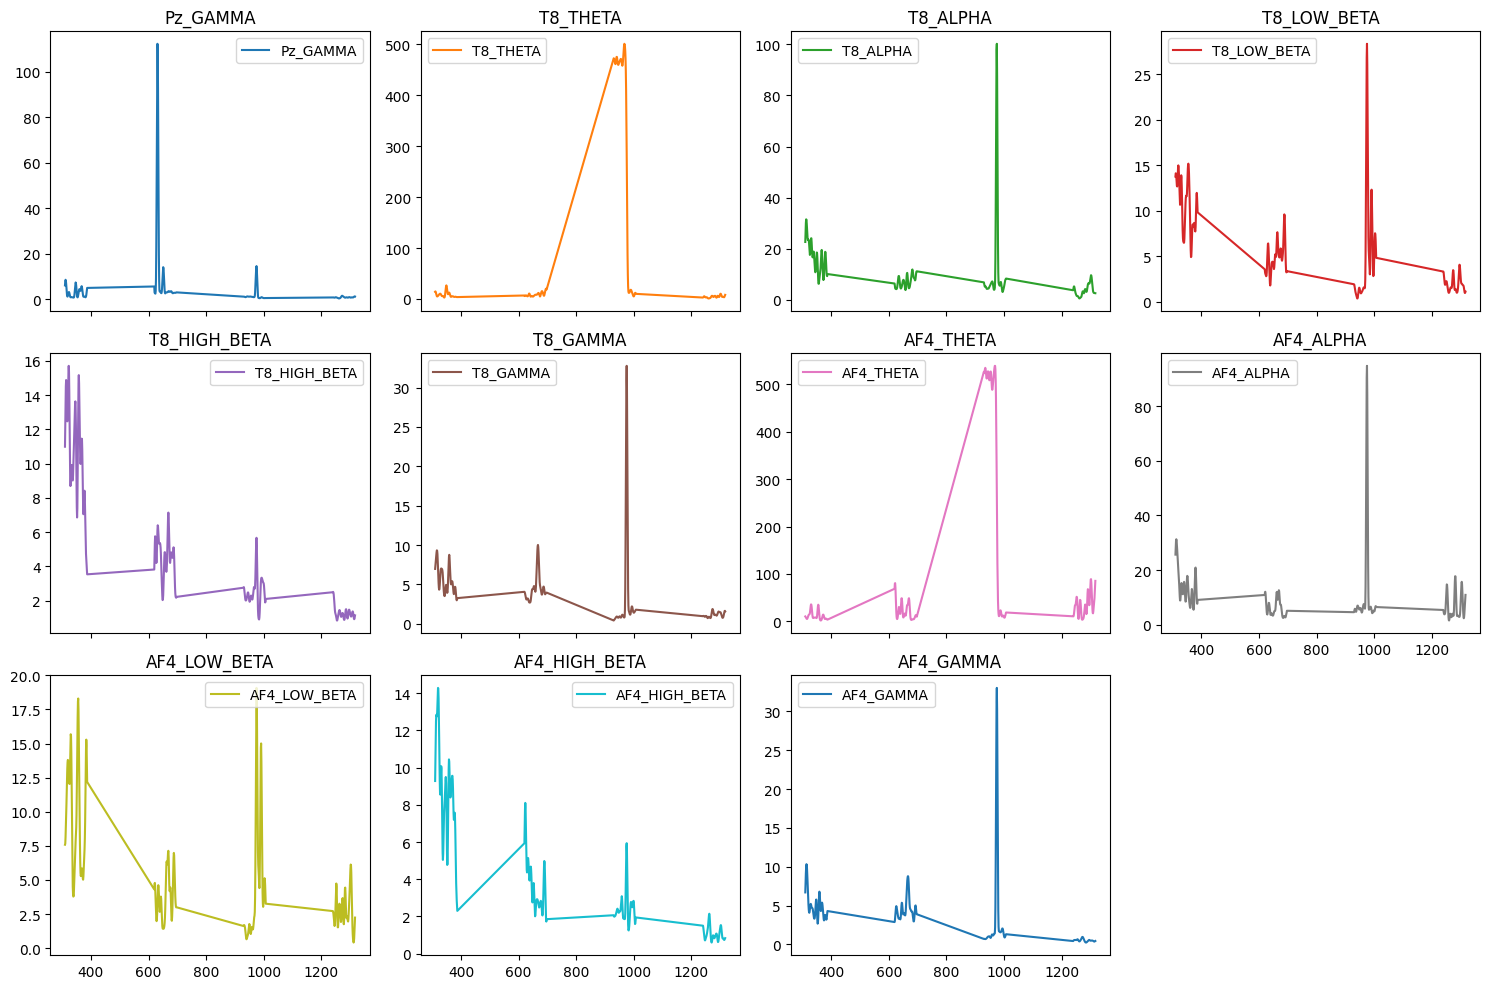

In [109]:
#Data Plot for the Label 1 - Possible Motor Imagery Data Points

columns_to_plot = [
    'Pz_GAMMA', 'T8_THETA', 'T8_ALPHA', 'T8_LOW_BETA', 'T8_HIGH_BETA',
    'T8_GAMMA', 'AF4_THETA', 'AF4_ALPHA', 'AF4_LOW_BETA', 'AF4_HIGH_BETA',
    'AF4_GAMMA'
]

target_label = 1

filtered_data = eeg_data[eeg_data['Label'] == target_label]

start_index = 200
end_index = 1500

filtered_data.loc[start_index:end_index, columns_to_plot].plot(subplots=True, layout=(3, 4), figsize=(15, 10), title=columns_to_plot)
plt.tight_layout()
plt.show()
